In [1]:
from preprocess_text import preprocess_text

In [2]:
import pandas as pd

def preprocess_and_save(input_file, output_file):
    # Function to preprocess text from input_file
    # Assuming preprocess_text() is defined elsewhere
    df = preprocess_text(input_file)
    
    # Save processed data to CSV
    df.to_csv(output_file, index=False)
    
    print(f"Lyrics have been saved to '{output_file}'")

# Example usage:
input_file = './Lyrical_Verses/Enumerated_GreenEggsAndHam.txt'
output_file = './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'

preprocess_and_save(input_file, output_file)


Lyrics have been saved to './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'


In [3]:
df = pd.read_csv('./Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv')
df

,Work Title,Subdivision Title,Line
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam
4,green eggs and ham by doctor seuss,stanza 4,i do not like green eggs and ham
...,...,...,...
99,green eggs and ham by doctor seuss,stanza 30,and i will eat them with a mouse
100,green eggs and ham by doctor seuss,stanza 30,and i will eat them here and there
101,green eggs and ham by doctor seuss,stanza 30,say i will eat them anywhere
102,green eggs and ham by doctor seuss,stanza 30,i do so like green eggs and ham


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(dataframe):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(dataframe['Line'])
    return tfidf_matrix, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)


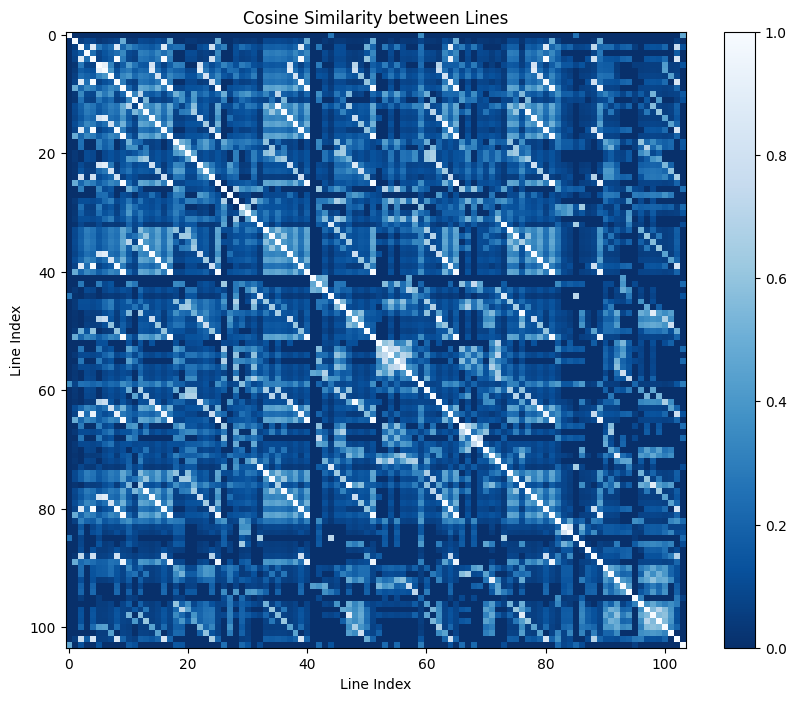

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def visualize_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix)
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(tfidf_matrix)


In [6]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Generate new text
input_text = "I am an Egg, Green Egg"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

# Decode the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text: ", generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:  I am an Egg, Green Egg, and Green Egg. I am a Green Egg, Green Egg, and Green Egg. I am a Green Egg, Green Egg, and Green Egg. I am a Green Egg, Green Egg, and Green Egg


In [7]:
import numpy as np

def compute_fractal_dimension(cosine_sim, threshold=0.5):
    points = np.argwhere(cosine_sim > threshold)
    distances = np.sqrt((points[:, 0] - points[:, 1])**2)
    radii = np.linspace(1, distances.max(), 50)
    mass = [np.sum(distances < r) for r in radii]
    
    log_radii = np.log(radii)
    log_mass = np.log(mass)
    
    slope, _ = np.polyfit(log_radii, log_mass, 1)
    fractal_dimension = slope
    return fractal_dimension

fractal_dimension = compute_fractal_dimension(cosine_sim)
print(f"Fractal Dimension: {fractal_dimension}")


NameError: name 'cosine_sim' is not defined